# **Binary Classification using Mushroom Dataset**


**GROUP COMPOSITION:**


*   Md. Ekhtear Ahammed
*   Rajib Chandra Ghosh
*   Semanto Mondal
*  Alberto Moccardi

NOTE: The Notebook is prepared for participating in the UNINA QISKIT COMPETITION

# Dataset Description

This dataset is a cleaned version of the original Mushroom Dataset for Binary Classification Available at UCI Library. This dataset was cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns:

*  Cap Diameter
*  Cap Shape
* Gill Attachment
* Gill Color
* Stem Height
* Stem Width
* Stem Color
* Season
* Target Class - Is it edible or not?

The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.


**More Information can be achived about the dataset from the below link:
[link text](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset)**


# Plan of Attack:


*   Loading the dataset and performing necessary preprocessing
*   Considering a subset of the original dataset and making a balance dataset to make the computation simpler
*   Selecting Important features using several feature selection techniques
*   Training Classical ML Models (Random Forest, SVM) and Quantum ML Models
* Testing the model's performance on test dataset
* Comparing the performance of classical ML models and Quantum ML Models in terms of accuracy and computation time



#Importing the Dataset

In [1]:
import pandas as pd
dataset=pd.read_csv("/content/mushroom_cleaned.csv")

In [ ]:
dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
len(dataset) #number of instances

54035

#Checking the missing values

There are no missing values in the dataset

In [ ]:
missing_values= dataset.isnull().sum()
print(missing_values)


cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


We can also check is there any unwanted negative values present in the dataset:

There are no negative values present in the dataset

So there is no unwanted negative values present in the dataset. So its a relief because we need not to handle missing values. Great :) !! Lets move forward.


In [ ]:
# select the numeric columns
numeric_cols = dataset.select_dtypes(include='number')

# count the number of negative values in each column
negative_counts = {}
for col in numeric_cols:
        negative_counts[col] = (dataset[col].lt(0).sum())

print("Negative value counts by column:")
for key, values in negative_counts.items():
  print(key,":", values)

Negative value counts by column:
cap-diameter : 0
cap-shape : 0
gill-attachment : 0
gill-color : 0
stem-height : 0
stem-width : 0
stem-color : 0
season : 0
class : 0


Let's check the unique values present in different features:

Now we will check what are the unique values present in a particular feature.

In [ ]:
#seperate the numerical and categorical columns
# select the numeric columns
numeric_column = dataset.select_dtypes(include='number')
# select the categorical columns
categorical_column = dataset.select_dtypes(include='object')

In [ ]:
#lets check the unique values
for column in numeric_column:
    print('Unique values present in {} Column: '.format(column), dataset[column].unique(),"\n")

Unique values present in cap-diameter Column:  [1372 1461 1371 ... 1847 1851 1885] 

Unique values present in cap-shape Column:  [2 6 4 0 1 5 3] 

Unique values present in gill-attachment Column:  [2 0 1 5 6 4 3] 

Unique values present in gill-color Column:  [10  5  7  9  0  3 11  8  1  6  4  2] 

Unique values present in stem-height Column:  [3.80746675 3.61249629 3.78757181 ... 1.95808827 1.98196221 2.01379412] 

Unique values present in stem-width Column:  [1545 1557 1566 ... 3271 2738 2995] 

Unique values present in stem-color Column:  [11 12  6 10  0  5  9  8  1  4  3  7  2] 

Unique values present in season Column:  [1.80427271 0.94319455 0.88845029 0.02737213] 

Unique values present in class Column:  [1 0] 



#EDA
Let's check the distribution of the target class. From the bar plot we can visualize that, the dataset is imbalabed and also there are in total 54035 instances are present. We are not going to consider all the instances. We are going to create a balance dataset using 500 instances to make the dataset small and to make the computation faster.

In [3]:
import plotly.express as px


# Count the occurrences of each class in the 'class' column
class_counts = dataset['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']

# Create a bar plot to visualize the distribution of the classes
fig = px.bar(class_counts, x='class', y='count',
             title="Class Distribution",
             labels={'class': 'Class', 'count': 'Count'},
             color='class',
             color_continuous_scale='Viridis')

# Show the plot
fig.show()


#Creating a balance dataset
Here in this section we are going to create a balance dataset of 500 instances. From each class there will be 250 instances.
* Class 0 - 250
* Class 1 - 250



In [2]:
# Get the unique classes in the 'class' column
classes = dataset['class'].unique()

# Check if there are exactly two classes
if len(classes) == 2:
    # Sample 250 instances for each class
    balanced_df = pd.concat([
        dataset[dataset['class'] == classes[0]].sample(n=250, random_state=42),
        dataset[dataset['class'] == classes[1]].sample(n=250, random_state=42)
    ])
else:
    print("Dataset does not contain exactly two classes.")

# Display the first few rows of the balanced dataset
print(balanced_df.head())

# Check the distribution of the classes in the balanced dataset
print(balanced_df['class'].value_counts())


       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
39100           723          6                0           7     0.628255   
50251           382          3                0          10     2.013794   
7783            926          6                6          10     1.786140   
18399           246          2                1          11     1.257786   
9855            150          0                0           3     0.545547   

       stem-width  stem-color    season  class  
39100        1323          11  0.888450      1  
50251           0           2  0.888450      1  
7783         1226          11  0.943195      1  
18399         455          12  0.943195      1  
9855          133           6  0.943195      1  
class
1    250
0    250
Name: count, dtype: int64


In [4]:
# Count the occurrences of each class in the 'class' column
class_counts = balanced_df['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']

# Create a bar plot to visualize the distribution of the classes
fig = px.bar(class_counts, x='class', y='count',
             title="Class Distribution",
             labels={'class': 'Class', 'count': 'Count'},
             color='class',
             color_continuous_scale='Viridis')

# Show the plot
fig.show()


# Feature Importance

In this section we are going to see three different methodologies to perform feature selection.

1. Correlation Matrix
2. Lasso Regression
3. Random Forest

# Correlation of the target features among other features

In [5]:
# Create a correlation matrix
corr = balanced_df.corr()

# Extract the correlation coefficients for the dependent variable 'class'
corr_dep = corr['class']

# Sort the correlation coefficients in descending order
corr_dep_sorted = corr_dep.sort_values(ascending=False)

# Create a bar plot using Plotly
fig = px.bar(
    x=corr_dep_sorted.values,
    y=corr_dep_sorted.index,
    orientation='h',  # Horizontal bar plot
    labels={'x': 'Correlation Coefficient', 'y': 'Independent Variable'},  # Axis labels
    title="Correlation Plot",  # Title of the plot
    color=corr_dep_sorted.values,  # Color bars based on correlation values
    color_continuous_scale='Viridis'  # Color scale
)

# Show the plot
fig.show()


#Feature Selection Using Random Forest

In [ ]:
# X is the feature matrix, which contains all columns except the target variable 'class'
X = balanced_df.drop(columns=['class'])

# y is the target vector, which contains only the target variable 'class'
y = balanced_df['class']

# Optionally, you can inspect the shapes of X and y to verify their correctness
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (500, 8)
y shape: (500,)


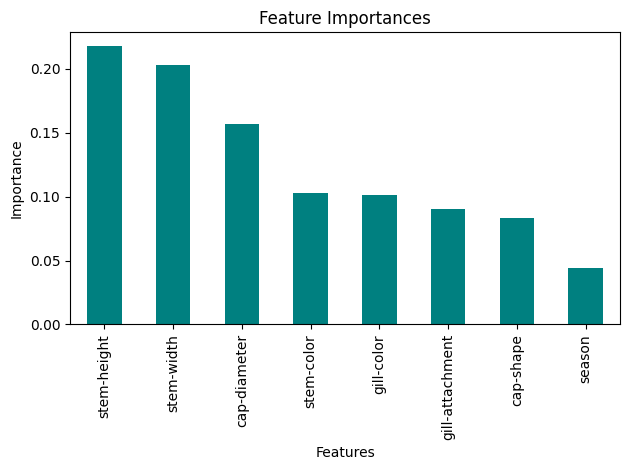

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are already prepared as per the previous steps

# Create a Random Forest classifier with your hyperparameters
model = RandomForestClassifier(n_estimators=340)

# Fit the model to the data
model.fit(X, y)

# Get the importance of the resulting features
importances = model.feature_importances_

# Create a data frame for visualization
final_df = pd.DataFrame({'Features': X.columns, 'Importances': importances})

# Sort the DataFrame by importance in descending order
final_df = final_df.sort_values('Importances', ascending=False)

# Plot the feature importances in bars
final_df.plot.bar(x='Features', y='Importances', color='teal', legend=False)

# Add title and labels for better clarity
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to make it more readable
plt.show()


#Feature Selection Using Lasso Regression (L1 Regularization)

 Selectiong The best value for the L1 regularization term alpha

In [ ]:
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# Standardize the features (important for Lasso regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize LassoCV (cross-validation to find the best alpha)
lasso_cv = LassoCV(cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_scaled, y)

# Get the best alpha chosen by cross-validation
print("Best alpha (lambda):", lasso_cv.alpha_)

# Get the coefficients for the best alpha
coefficients_cv = lasso_cv.coef_

# Identify the selected features (non-zero coefficients)
selected_features_cv = np.where(coefficients_cv != 0)[0]
print("Selected features (indices):", selected_features_cv)


Best alpha (lambda): 0.00013014099758545798
Selected features (indices): [0 1 2 3 4 5 6 7]


           Feature  Coefficient  Abs Coefficient
4      stem-height     0.126411         0.126411
5       stem-width    -0.087507         0.087507
6       stem-color    -0.083133         0.083133
1        cap-shape    -0.058746         0.058746
0     cap-diameter     0.047297         0.047297
7           season    -0.029596         0.029596
3       gill-color     0.014590         0.014590
2  gill-attachment     0.012377         0.012377

Selected features: ['stem-height' 'stem-width' 'stem-color' 'cap-shape' 'cap-diameter'
 'season' 'gill-color' 'gill-attachment']


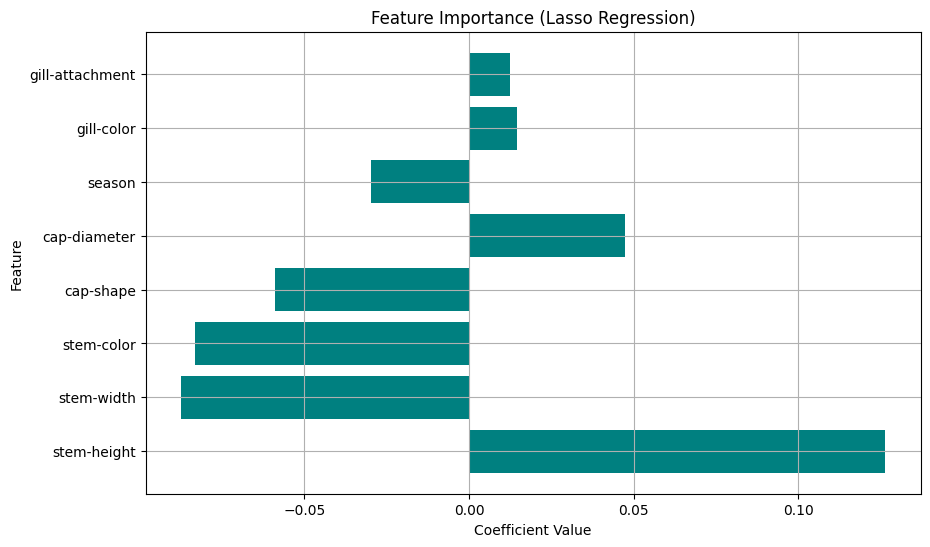

In [ ]:
feature_names = X.columns

# Initialize the Lasso model with the given alpha value
lasso = Lasso(alpha=0.00013014099758545798)

# Fit the Lasso model to the data
lasso.fit(X_scaled, y)

# Get the coefficients from the trained Lasso model
coefficients = lasso.coef_

# Create a DataFrame to view the coefficients and their corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features based on the absolute value of their coefficients
coef_df['Abs Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs Coefficient', ascending=False)

# Display the sorted coefficients and selected features
print(coef_df)

# Select the features with non-zero coefficients (these are the selected features)
selected_features = coef_df[coef_df['Coefficient'] != 0]['Feature'].values
print("\nSelected features:", selected_features)

# Plotting the feature importance using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Lasso Regression)')
plt.grid(True)
plt.show()


Upon analysing the different results of feature selection techniques we are considering the top 4 features as follows:

1. stem-height
2. stem-width
3. stem-color
4. cap-diameter

#Dataset with new features

In [6]:
# Select only the desired features
selected_features_df = balanced_df[['stem-height', 'stem-width', 'stem-color', 'cap-diameter','class']]

# Show the first few rows of the new DataFrame with selected features
print(selected_features_df.head())


       stem-height  stem-width  stem-color  cap-diameter  class
39100     0.628255        1323          11           723      1
50251     2.013794           0           2           382      1
7783      1.786140        1226          11           926      1
18399     1.257786         455          12           246      1
9855      0.545547         133           6           150      1


In [7]:
# X is the feature matrix, which contains all columns except the target variable 'class'
X = selected_features_df.drop(columns=['class'])

# y is the target vector, which contains only the target variable 'class'
y = selected_features_df['class']

# Optionally, you can inspect the shapes of X and y to verify their correctness
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (500, 4)
y shape: (500,)


#Classical SVM

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_selected and y are your selected features and target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine model
svm = SVC(kernel='linear', C=1.0)

# Measure the time taken for training
start_time = time.time()
svm.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the time taken for prediction
start_time = time.time()
y_pred = svm.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model using accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"SVM Model Accuracy: {accuracy:.4f}")
print(report)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")


SVM Model Accuracy: 0.5700
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        54
           1       0.53      0.63      0.57        46

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.58      0.57      0.57       100

Training Time: 63.9578 seconds
Prediction Time: 0.0076 seconds


#Quantum SVM

In [8]:
!pip install qiskit[visualization]==1.2.0
# Use the following if you are on MacOS/zsh
#!pip install 'qiskit[visualization]'==1.1.0
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit
!pip install qiskit-machine-learning
!pip install qiskit-aer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 11.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b1585a5f4d46fb55ad6244bb30cbe010fef968c363de53e23c387a141970bca3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from qiskit_aer import Aer
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.metrics import confusion_matrix, classification_report

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Set the backend for noise-free simulation
backend = Aer.get_backend('aer_simulator')


# Define the Real Amplitude ansatz with specified layers and entanglement pattern
#ansatz = RealAmplitudes(num_qubits=4, reps=4, entanglement='linear')

# Define the ZZ Feature Map with specified number of layers, entanglement pattern, and features
feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear')

# Create the fidelity quantum kernel, note there is no quantum_instance argument
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Initialize QSVC with the custom quantum kernel
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Train the model
start_time = time.time()
print("Training QSVM...")
qsvc.fit(X_train, y_train)
training_time = time.time() - start_time



Training QSVM...


In [ ]:
# Predict the training and test data
#y_train_pred = qsvc.predict(X_train)
y_test_pred = qsvc.predict(X_test)

# Evaluate the model on the training data
#train_accuracy = qsvc.score(X_train, y_train)
#print(f"QSVC Model accuracy on training set: {train_accuracy:.2f}")

#print("\nTraining Set Confusion Matrix:")
#print(confusion_matrix(y_train, y_train_pred))

#print("\nTraining Set Classification Report:")
#print(classification_report(y_train, y_train_pred))

# Evaluate the model on the test data
test_accuracy = qsvc.score(X_test, y_test)
print(f"\nQSVC Model accuracy on test set: {test_accuracy:.2f}")

print("\nTest Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

print ("\Training Time:", training_time)


QSVC Model accuracy on test set: 0.60

Test Set Confusion Matrix:
[[36 18]
 [22 24]]

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        54
           1       0.57      0.52      0.55        46

    accuracy                           0.60       100
   macro avg       0.60      0.59      0.59       100
weighted avg       0.60      0.60      0.60       100

\Training Time: 512.6008648872375


# Variational Quantum Classifier (VQC):

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
type(y)

pandas.core.series.Series

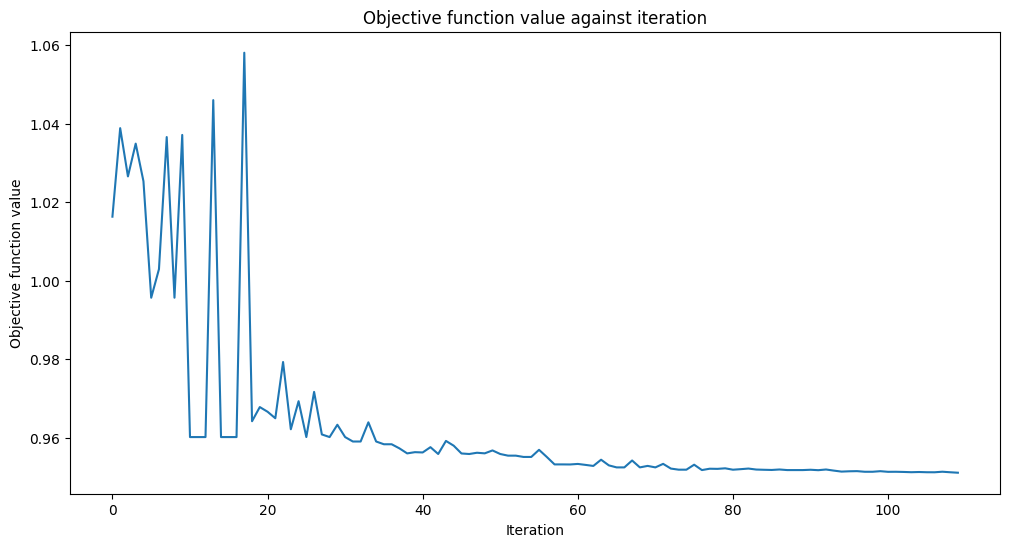

Training time: 352 seconds


In [ ]:
import time
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.neural_networks import SamplerQNN
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler

# min-max the features
#X=X.to_numpy()
#y=y.to_numpy()
X_scaled = MinMaxScaler().fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the backend for noise-free simulation
backend = AerSimulator()


num_features = 4

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=3, entanglement='linear')
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)


ansatz = RealAmplitudes(num_qubits=num_features, reps=3, entanglement='linear')
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)



optimizer = COBYLA(maxiter=110)


sampler = Sampler()




vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(X_train, y_train)
test_score_q4 = vqc.score(X_test, y_test)
print(f"Training time: {round(elapsed)} seconds")

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Training time: 352 seconds
Quantum VQC on the training dataset: 0.61
Quantum VQC on the test dataset:     0.65


#Classical Random Forest

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# X is the feature matrix, which contains all columns except the target variable 'class'
X = selected_features_df.drop(columns=['class'])

# y is the target vector, which contains only the target variable 'class'
y = selected_features_df['class']


# Preprocess the data: Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model on the training data
start = time.time()
rf_classifier.fit(X_train, y_train)
end = time.time() - start


# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f"Training time: {round(end)} seconds")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report of Random Forest:\n", classification_report(y_test, y_pred))



Training time: 2 seconds
Accuracy: 0.73

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        54
           1       0.73      0.65      0.69        46

    accuracy                           0.73       100
   macro avg       0.73      0.72      0.73       100
weighted avg       0.73      0.73      0.73       100



#QNN (Quantum Neural Network)
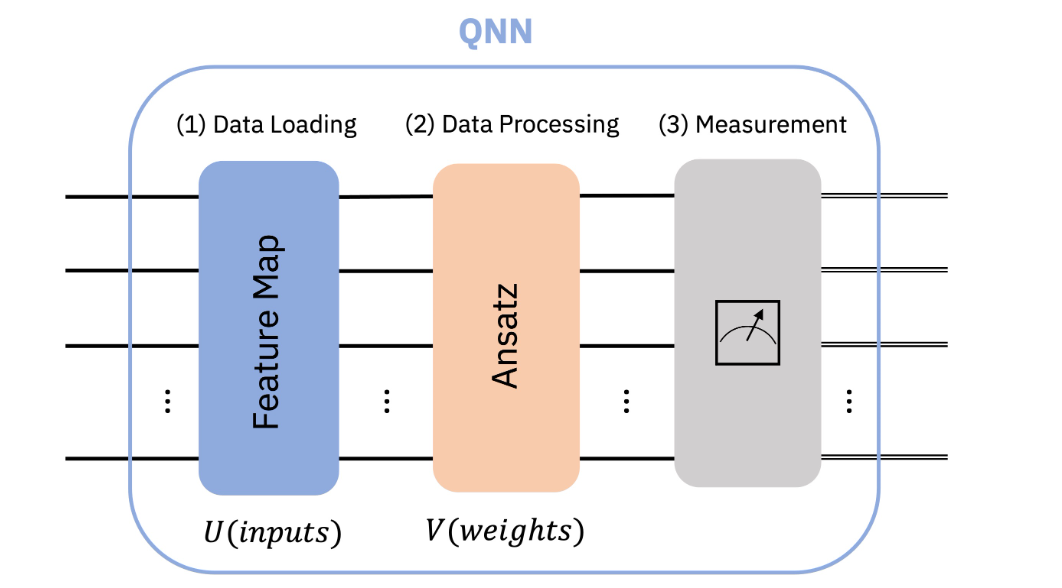

In [10]:
# callback function that draws a live plot when the .fit() method is called
from IPython.display import clear_output
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

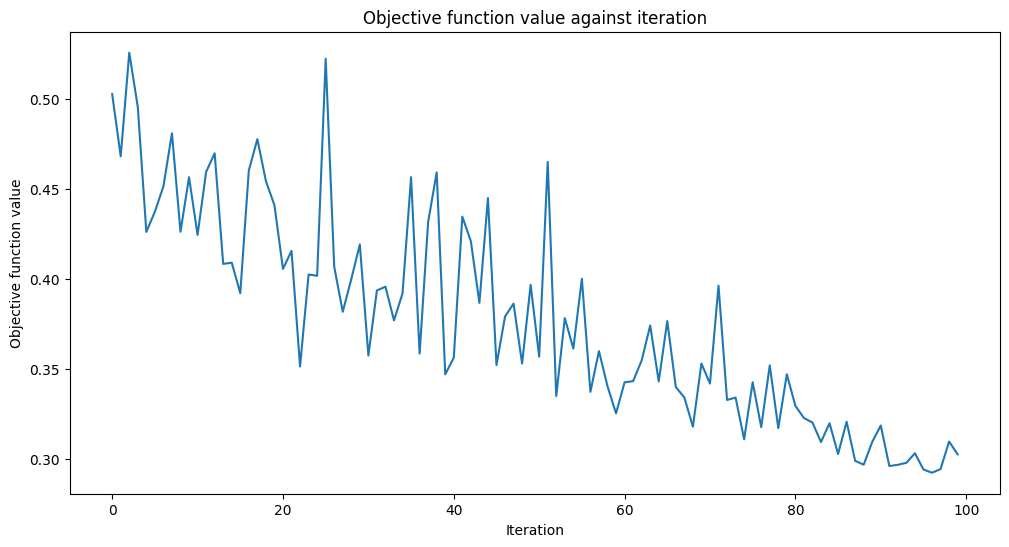

Training time: 392.33 seconds
              precision    recall  f1-score   support

           0       0.44      0.07      0.13        54
           1       0.45      0.89      0.60        46

    accuracy                           0.45       100
   macro avg       0.45      0.48      0.36       100
weighted avg       0.45      0.45      0.34       100



In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from qiskit.circuit.library import   ZZFeatureMap, PauliFeatureMap,ZFeatureMap, RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_aer import AerSimulator
from qiskit_machine_learning.optimizers import COBYLA, SPSA, ADAM
from qiskit import QuantumCircuit
import time
import matplotlib.pyplot as plt
from scipy.special import expit  # For sigmoid activation
from qiskit.circuit.library import EfficientSU2
import random
#random.seed(42)

# Preprocess the data
X = selected_features_df.drop(columns=['class'])
y = selected_features_df['class']

X = X.to_numpy()
y = y.to_numpy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the backend for noise-free simulation
backend = AerSimulator()

# Define the quantum circuit
num_features = X_train.shape[1]  # Number of features in the training set
#feature_map = PauliFeatureMap(feature_dimension=num_features, reps=2, entanglement="full")
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")
#feature_map = ZFeatureMap(feature_dimension=num_features, reps=3)
#ansatz = EfficientSU2(num_qubits=num_features, reps=8, entanglement="circular")
ansatz = RealAmplitudes(num_qubits=num_features, reps=8, entanglement="linear")

# Combine feature map and ansatz into a single circuit
qnn_circuit = QuantumCircuit(num_features)
qnn_circuit.compose(feature_map, inplace=True)
qnn_circuit.compose(ansatz, inplace=True)

# Build the QNN
qnn = EstimatorQNN(
    circuit=qnn_circuit,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)

# Define Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    """
    Binary Cross-Entropy loss function
    """
    epsilon = 1e-15  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Ensure predictions are between 0 and 1
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define a Neural Network Classifier
class CustomQNNClassifier(NeuralNetworkClassifier):
    def __init__(self, neural_network, optimizer, callback=None):
        super().__init__(neural_network=neural_network, optimizer=optimizer, callback=callback)

    def predict(self, X):
        # Run the quantum model on the data
        qnn_output = super().predict(X)
        # Apply sigmoid activation and threshold for binary classification
        qnn_output = expit(qnn_output)  # Sigmoid function for [0, 1] output
        return qnn_output

    def objective_function(self, X, y):
        """
        Define the custom loss function during training
        We compute Binary Cross-Entropy loss between true labels and predicted probabilities.
        """
        predictions = self.neural_network.predict(X)
        return binary_cross_entropy(y, predictions)

# Create custom classifier
qnn_classifier = CustomQNNClassifier(
    neural_network=qnn,
    optimizer=COBYLA(maxiter=100),
    callback=callback_graph
)

# Create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# Train the QNN
start = time.time()
qnn_classifier.fit(X_train, y_train)
end = time.time() - start

print(f"Training time: {end:.2f} seconds")

# Test the model and print classification report
y_pred = qnn_classifier.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert probability to class (0 or 1)
print(classification_report(y_test, y_pred_class))

# Return to default figsize for plotting
plt.rcParams["figure.figsize"] = (6, 4)


In [ ]:
num_features = X_train.shape[1]
print(num_features)

4


# Classical Artificial Neural Network

In [115]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import time

# Preprocess the data
X = selected_features_df.drop(columns=['class'])
y = selected_features_df['class']

X = X.to_numpy()
y = y.to_numpy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()



# Input layer + 6 hidden layer
model.add(Input(shape=(X_train.shape[1],)))
for _ in range(7):  # 5 hidden layers
    model.add(Dense(64, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
end = time.time() - start

# Print training time
print(f"Training time: {end:.2f} seconds")

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert probability to class (0 or 1)

# Print classification report
print(classification_report(y_test, y_pred_class))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4808 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5558 - loss: 0.6848 - val_accuracy: 0.6000 - val_loss: 0.6742
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6299 - loss: 0.6579 - val_accuracy: 0.5900 - val_loss: 0.6624
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6471 - loss: 0.6269 - val_accuracy: 0.6200 - val_loss: 0.6720
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6228 - loss: 0.6423 - val_accuracy: 0.6000 - val_loss: 0.6931
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6261 - loss: 0.6312 - val_accuracy: 0.6400 - val_loss: 0.6350
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6594 - loss: 0.6283 - val_accuracy: 0.6100 - val_loss: 0.6347
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6510 - loss: 0.6307 - val_accuracy: 0.6100 - val_

# Kernal PCA vs Quantum Kernal PCA

In [85]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute

# Preprocess the data
X = selected_features_df.drop(columns=['class'])
y = selected_features_df['class']

X = X.to_numpy()
y = y.to_numpy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Set up the backend for noise-free simulation
backend = AerSimulator()


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Define a feature map (quantum feature transformation)
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=4, entanglement="full")

# Define Fidelity Quantum Kernel
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)
qpca_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# Evaluate kernel matrices
matrix_train = qpca_kernel.evaluate(x_vec=X_train)
matrix_test = qpca_kernel.evaluate(x_vec=X_test, y_vec=X_train)

print("Quantum kernel matrices computed!")


<ipython-input-85-37db058b4eaa>:27: DeprecationWarning:

The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.

<ipython-input-85-37db058b4eaa>:29: DeprecationWarning:

V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.



Quantum kernel matrices computed!


In [111]:
from sklearn.decomposition import KernelPCA
#with classical pca
kernel_pca_rbf = KernelPCA(n_components=2, kernel="linear")
kernel_pca_rbf.fit(X_train)
train_features_rbf = kernel_pca_rbf.transform(X_train)
test_features_rbf = kernel_pca_rbf.transform(X_test)

#with quantum pca

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

In [113]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, y_train)

logistic_score = logistic_regression.score(test_features_q, y_test)
print(f"Logistic regression score with quantum pca: {logistic_score}")

Logistic regression score with quantum pca: 0.61


In [114]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_rbf, y_train)

logistic_score = logistic_regression.score(test_features_rbf, y_test)
print(f"Logistic regression score with classical kernal pca: {logistic_score}")

Logistic regression score with classical kernal pca: 0.62


In [94]:
def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


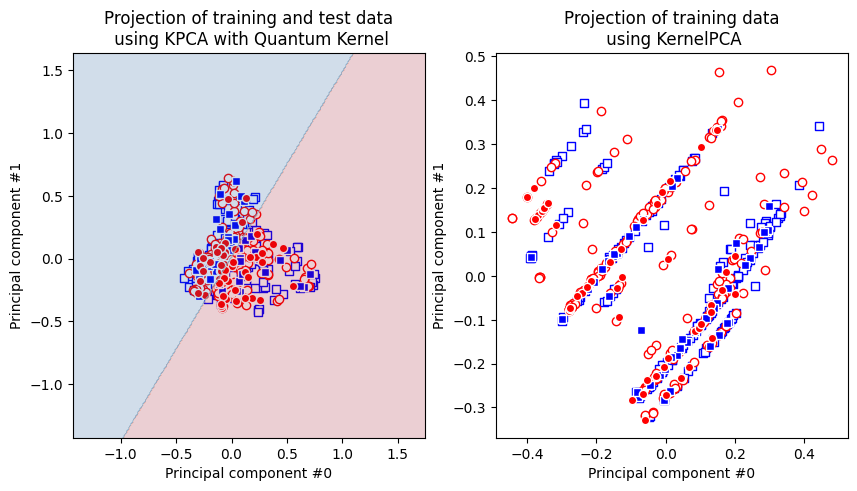

In [105]:
fig, (q_ax, rbf_ax) = plt.subplots(1, 2, figsize=(10, 5))


plot_features(q_ax, train_features_q, y_train, 0, "s", "w", "b", "A train")
plot_features(q_ax, train_features_q, y_train, 1, "o", "w", "r", "B train")

plot_features(q_ax, test_features_q, y_test, 0, "s", "b", "w", "A test")
plot_features(q_ax, test_features_q, y_test, 1, "o", "r", "w", "A test")

q_ax.set_ylabel("Principal component #1")
q_ax.set_xlabel("Principal component #0")
q_ax.set_title("Projection of training and test data\n using KPCA with Quantum Kernel")

# Plotting the linear separation
h = 0.01  # step size in the mesh

# create a mesh to plot in
x_min, x_max = train_features_q[:, 0].min() - 1, train_features_q[:, 0].max() + 1
y_min, y_max = train_features_q[:, 1].min() - 1, train_features_q[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
predictions = predictions.reshape(xx.shape)
q_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)

plot_features(rbf_ax, train_features_rbf, y_train, 0, "s", "w", "b", "A train")
plot_features(rbf_ax, train_features_rbf, y_train, 1, "o", "w", "r", "B train")
plot_features(rbf_ax, test_features_rbf, y_test, 0, "s", "b", "w", "A test")
plot_features(rbf_ax, test_features_rbf, y_test, 1, "o", "r", "w", "A test")

rbf_ax.set_ylabel("Principal component #1")
rbf_ax.set_xlabel("Principal component #0")
rbf_ax.set_title("Projection of training data\n using KernelPCA")
plt.show()


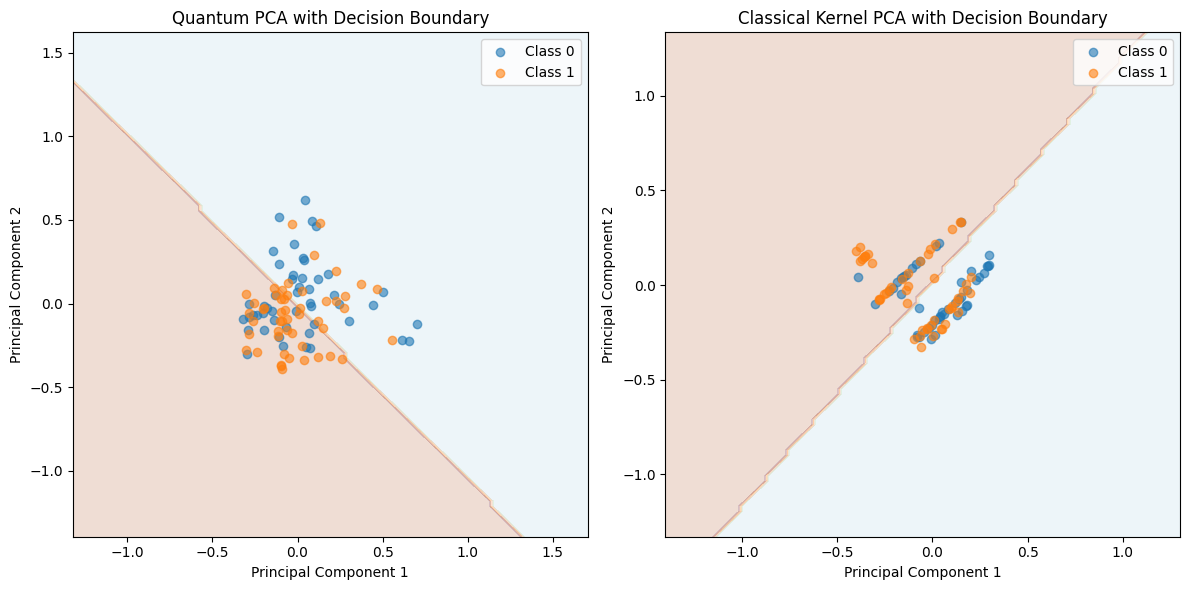

In [112]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Train Logistic Regression for Quantum PCA using training data
clf_q = LogisticRegression()
clf_q.fit(train_features_q, y_train)

# Train Logistic Regression for Classical PCA using training data
clf_rbf = LogisticRegression()
clf_rbf.fit(train_features_rbf, y_train)

# Create grid points for plotting decision boundary (based on test dataset)
x_min_q, x_max_q = test_pc1_q.min() - 1, test_pc1_q.max() + 1
y_min_q, y_max_q = test_pc2_q.min() - 1, test_pc2_q.max() + 1
xx_q, yy_q = np.meshgrid(np.linspace(x_min_q, x_max_q, 100), np.linspace(y_min_q, y_max_q, 100))

x_min_rbf, x_max_rbf = test_pc1_rbf.min() - 1, test_pc1_rbf.max() + 1
y_min_rbf, y_max_rbf = test_pc2_rbf.min() - 1, test_pc2_rbf.max() + 1
xx_rbf, yy_rbf = np.meshgrid(np.linspace(x_min_rbf, x_max_rbf, 100), np.linspace(y_min_rbf, y_max_rbf, 100))

# Predict for grid points on the test data
Z_q = clf_q.predict(np.c_[xx_q.ravel(), yy_q.ravel()])
Z_rbf = clf_rbf.predict(np.c_[xx_rbf.ravel(), yy_rbf.ravel()])

Z_q = Z_q.reshape(xx_q.shape)
Z_rbf = Z_rbf.reshape(xx_rbf.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Quantum PCA Subplot
plt.subplot(1, 2, 1)
plt.contourf(xx_q, yy_q, Z_q, alpha=0.2, cmap=plt.cm.Paired)
for label in np.unique(y_test):
    plt.scatter(
        test_pc1_q[y_test == label],
        test_pc2_q[y_test == label],
        label=f"Class {label}",
        alpha=0.6,
    )
plt.title("Quantum PCA with Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Classical PCA Subplot
plt.subplot(1, 2, 2)
plt.contourf(xx_rbf, yy_rbf, Z_rbf, alpha=0.2, cmap=plt.cm.Paired)
for label in np.unique(y_test):
    plt.scatter(
        test_pc1_rbf[y_test == label],
        test_pc2_rbf[y_test == label],
        label=f"Class {label}",
        alpha=0.6,
    )
plt.title("Classical Kernel PCA with Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.tight_layout()
plt.show()


#Performance Comparision
We have trained and tested both classical and quantum machine learning models to check their performance on the small subject of the mushroom dataset where we just have considered 1000 instances with 9 features (8+1). We have just considered 4 features using feature selection techniques to reduce the dimentionality and computational complexity. We have aslo tried to utilized PCA for dimentionality reduction and got similar type of results. That's why to make the notebook cleaner we are excluding the PCA part.

In [131]:
import plotly.graph_objects as go

# Data for models, accuracy, and computation time
models = ['SVC', 'QSVC', 'Random Forest', 'VQC', 'QNN', 'ANN', 'LR with Kernel PCA', 'LR with Quantum PCA']
accuracy = [0.57, 0.60, 0.73, 0.65, 0.53, 0.69, 0.62, 0.61]
computation_time = [64, 512, 2, 352, 600, 15, 120, 1800]

# Create figure
fig = go.Figure()

# Add Accuracy bars (blue) on the left y-axis
fig.add_trace(go.Bar(
    x=models,
    y=accuracy,
    name='Accuracy',
    marker_color='blue',
    opacity=0.7,
    yaxis='y1'
))


fig.add_trace(go.Bar(
    x=models,
    y=computation_time,
    name='Computation Time',
    marker_color='green',
    opacity=0.7,
    yaxis='y2'
))


fig.update_layout(
    barmode='group',
    title='Model Comparison: Accuracy vs Computation Time',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    yaxis2=dict(
        title='Computation Time (seconds)',
        overlaying='y',
        side='right'
    ),
    xaxis=dict(tickangle=45),
    showlegend=True
)

# Show plot
fig.show()


#References
1. https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap

2. https://qiskit-community.github.io/qiskit-machine-learning/tutorials/01_neural_networks.html

3. https://qiskit-community.github.io/qiskit-algorithms/apidocs/qiskit_algorithms.optimizers.html

4. https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html

5. https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.EfficientSU2

6. https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02_neural_network_classifier_and_regressor.html

7. https://qiskit-community.github.io/qiskit-machine-learning/tutorials/03_quantum_kernel.html#4.-Kernel-Principal-Component-Analysis